In [ ]:
# General utilities
import re
import string
from collections import Counter
from pprint import pprint
import pandas as pd
# Web scraping and data extraction
import requests
from bs4 import BeautifulSoup
from tika import parser  # For parsing PDFs
# Natural Language Processing
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# Named Entity Recognition and advanced NLP
import spacy
from spacy import displacy
import textacy
from textacy import extract
# Keyword extraction
from rake_nltk import Rake
import yake
# Sentiment Analysis
import json
import numpy as np
from textblob import TextBlob
# WordCloud visualization
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
# Recommendation systems
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
# Miscellaneous for visualization and warnings
import matplotlib
import warnings
warnings.filterwarnings("ignore")
# required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Q1**

In [ ]:
def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html.parser')
    for script in soup(["script", "style", 'aside']):
        script.extract()
    return " ".join(re.split(r'[\n\t]+', soup.get_text()))


In [ ]:
nlp = spacy.load("en_core_web_sm")
ny_bb = url_to_string('https://tribune.com.pk/story/2510128/lahores-air-quality-improves-drops-out-of-hazardous-category')
article = nlp(ny_bb)
len(article.ents)

102

In [ ]:
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({'ORG': 17,
         'ORDINAL': 2,
         'DATE': 12,
         'GPE': 23,
         'PERSON': 13,
         'CARDINAL': 19,
         'NORP': 4,
         'TIME': 3,
         'FAC': 2,
         'PRODUCT': 3,
         'WORK_OF_ART': 2,
         'EVENT': 1,
         'LOC': 1})

In [ ]:
items = [x.text for x in article.ents]
Counter(items).most_common(3)

[('Lahore', 10), ('Punjab', 6), ('AQI', 4)]

In [ ]:
sentences = [x for x in article.sents]

s = sentences[0]
print(s)

             Lahore AQI drops, still ranked second worst            


In [ ]:
displacy.render(nlp(str(s)), jupyter=True, style='ent')

In [ ]:
dict([(str(x), x.label_) for x in nlp(str(s)).ents])

{'AQI': 'ORG', 'second': 'ORDINAL'}

In [ ]:
displacy.render(nlp(str(sentences)), jupyter=True, style='ent')

Total Entities Detected:

102 entities across categories like GPE (23), CARDINAL (19), and ORG (17). These highlight the focus on locations, numerical values, and organizations.

Most Common Entities:

Entities such as "Lahore" (10 mentions), "Punjab" (6 mentions), and "AQI" (4 mentions) emphasize the article’s focus on air quality in Lahore and Punjab.

Example Sentence Analysis:

Sentence: "Lahore AQI drops, still ranked second worst."
Lahore AQI tagged as ORG (misclassification; AQI should relate to air quality metrics).
second correctly labeled as ORDINAL.

Visualization Insights:

Displacy highlights entities effectively, particularly for locations (GPE) and dates, but errors like tagging "AQI" as ORG or "smog" as PERSON show limitations.

Observations and Shortcomings

Strengths:

Accurate recognition of locations, numerical values, and dates.
Frequent mentions align well with the article's focus on air quality.

Shortcomings:

Misclassifications (e.g., "AQI" as ORG, "smog" as PERSON).
Limited domain knowledge for environmental terms like "AQI" or "smog."
Context ambiguity in single-word entities (e.g., "US").

**Q2**

In [ ]:
raw = parser.from_file('Decoding the puzzle of human consciousness.pdf')

In [ ]:
tokenize_words = nltk.tokenize.word_tokenize(raw['content'])

In [ ]:
text = raw['content']  # Ensure 'text' now contains the parsed content
if text is None:
    raise ValueError("The PDF content could not be parsed. Ensure the file contains readable text.")
stopwords = nltk.corpus.stopwords.words('english')
tokens = [word.lower() for word in nltk.word_tokenize(text) if word.isalpha() and word.lower() not in stopwords]

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(["T", "J", "D", "S", "M", "H", "et al", "et", "pp", "a.", "m.", "d.", "j.", "s.", "r.", "c.", "t."])
no_stopwords = [word for word in tokenize_words if word.lower() not in stopwords]

# remove punctuation, count raw words
nonPunct = re.compile('.*[A-Za-z].*')
clean_words = [w for w in no_stopwords if nonPunct.match(w)]

In [ ]:
filtered_word_freq = nltk.FreqDist(clean_words)
filtered_word_freq.most_common(20)

[('consciousness', 31),
 ('conscious', 22),
 ('brain', 21),
 ('like', 12),
 ('animals', 12),
 ('theory', 11),
 ('may', 10),
 ('pain', 8),
 ('humans', 8),
 ('con-', 8),
 ('September', 7),
 ('brains', 7),
 ('fi', 7),
 ('self', 7),
 ('problem', 6),
 ('might', 6),
 ('many', 6),
 ('R', 6),
 ('function', 6),
 ('sh', 6)]

<Axes: title={'center': 'Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)'}, xlabel='Samples', ylabel='Counts'>

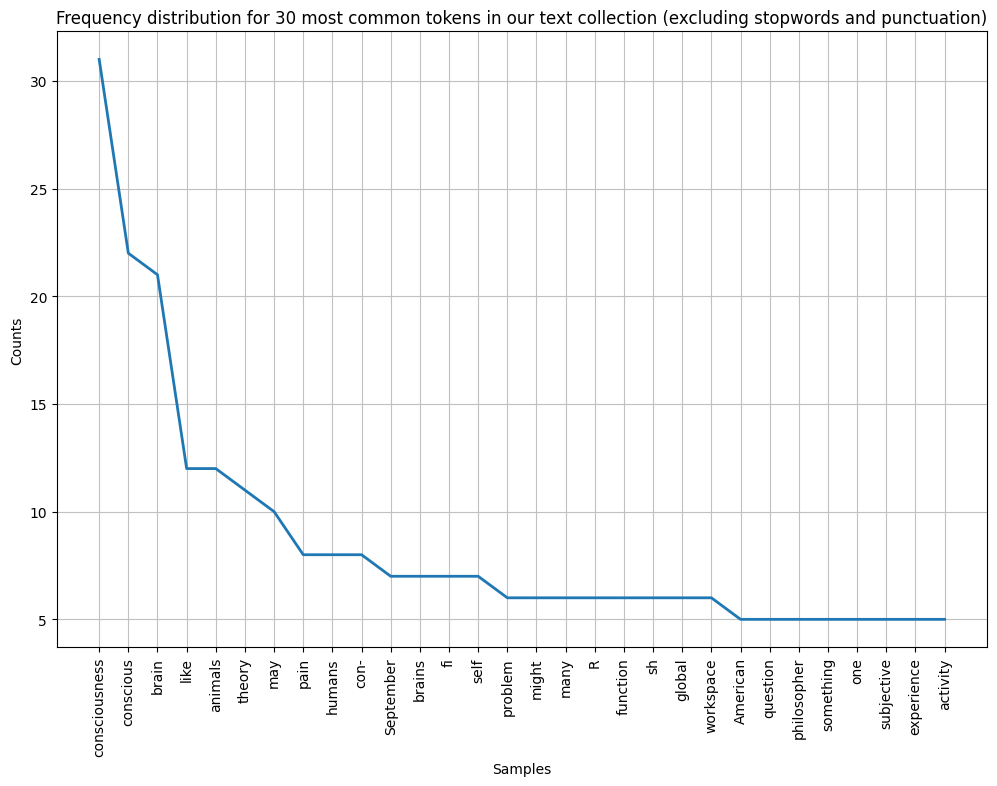

In [ ]:
filtered_word_freq.plot(30,title='Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)')

In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]

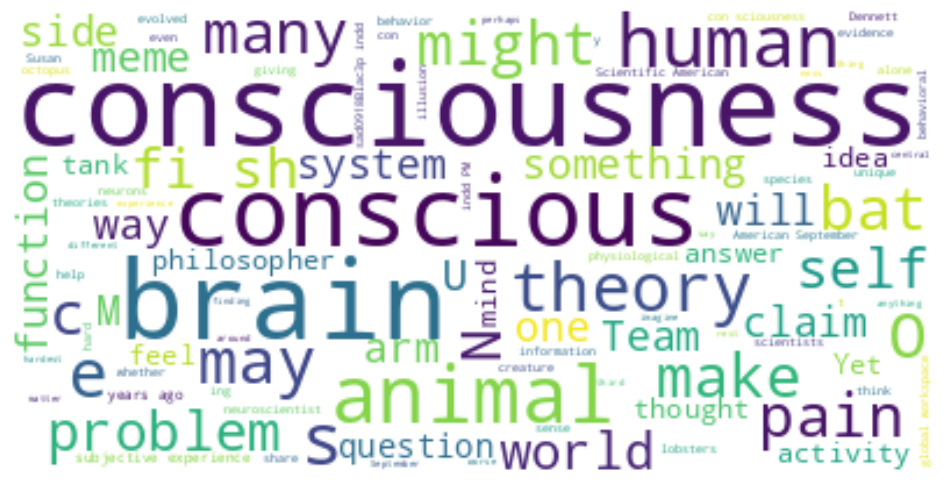

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(raw['content'])
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

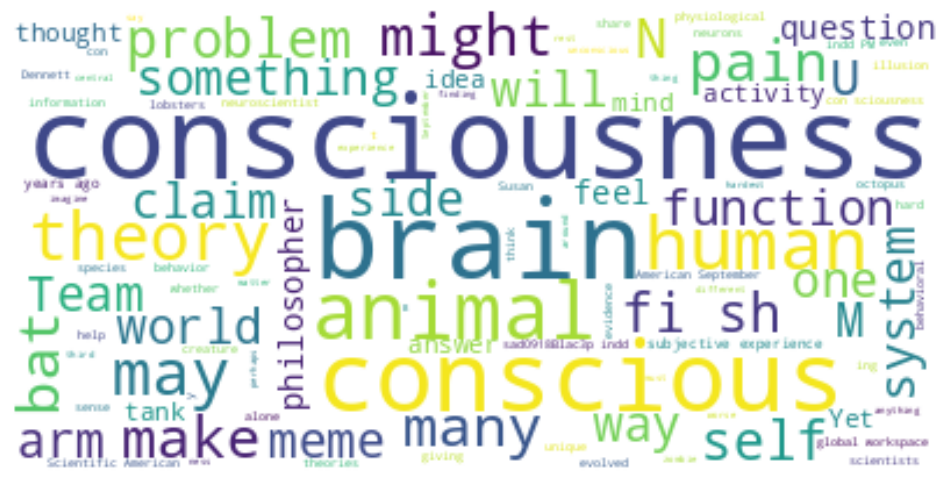

In [ ]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["E", "S", "C", "O"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(raw['content'])

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
kw_extractor = yake.KeywordExtractor()
language = "en"
max_ngram_size = 3
deduplication_threshold = 0.9
numOfKeywords = 20
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(raw['content'])
for kw in keywords:
    print(kw)

('HARDEST PROBLEM DECODING', 0.004823696382908052)
('ILLUSTR ATION', 0.005044746135544164)
('ATION BY VICTO', 0.005090321331078704)
('VICTO NGAI', 0.005090321331078704)
('DECODING THE PUZZLE', 0.005090321331078704)
('CONSCIOUSNESS', 0.006036124637669853)
('Scientific American', 0.008848156323556481)
('brain', 0.010392649233333294)
('conscious', 0.011203878843543737)
('NGAI THE HARDEST', 0.011558050620555246)
('HUMAN CONSCIOUSNESS', 0.015301576730196276)
('animals', 0.023720718513146954)
('Scientific', 0.027466349297027425)
('PROBLEM DECODING', 0.028059758050011575)
('brains', 0.031177947699999882)
('hardest problem', 0.032808822473679826)
('September', 0.03545400614971809)
('theory', 0.03770923097700109)
('humans', 0.039777644698616506)
('makes human consciousness', 0.04644404161833693)


Word Frequency Analysis

Key Findings: Frequent words include "consciousness" (31), "conscious" (22), and "brain" (21), highlighting the paper's focus on consciousness and its connection to the brain.

Noise: Words like "September" and "fi" indicate potential parsing errors.

Visualization: The plot shows a sharp drop-off after top words, emphasizing a focused theme with secondary aspects like "theory" and "pain."

Keyword Extraction (YAKE)

Key Phrases: Extracted keywords such as "HARDEST PROBLEM DECODING" and "DECODING THE PUZZLE" capture the research's central themes. Contextual terms like "Scientific American" and "human consciousness" add publication details.

Noise: Some phrases like "ATION BY VICTO" reflect formatting errors.

Comparison:
Techniques (Frequency, YAKE):
Strengths:
Frequency: Highlights core terms; simple and effective.
YAKE:	Extracts descriptive multi-word phrases.
Shortcomings:
Frequency: Misses multi-word terms; includes noise.

YAKE: Outputs some irrelevant phrases.

Both techniques confirm the paper’s focus on consciousness. Word frequency offers straightforward insights, while YAKE identifies richer phrases. Combining both can improve keyword relevance while reducing noise.

**Q3**

In [7]:
s = TextBlob('CS 457 is the worst course I have ever taken')
s.sentiment

Sentiment(polarity=-1.0, subjectivity=1.0)

In [8]:
s = TextBlob('CS 457 is the best course throughout my course work')
s.sentiment

Sentiment(polarity=1.0, subjectivity=0.3)

In [10]:
with open('AOC_tweets.txt', 'r', encoding='utf-8') as file:
    twittertext = file.read()

In [11]:
tweets = twittertext.strip().split("\n\n")

In [14]:
results = []
positive = 0
negative = 0

for tweet in tweets:
    score = TextBlob(tweet).sentiment.polarity
    if score > 0:
        positive+=1
    else:
        negative+=1
    results.append(score)

df = pd.DataFrame({'tweet': tweets, 'sentiment': results})

print(df)

                                                tweet  sentiment
0   "If people want to talk about members of Congr...   0.228571
1   "A lot of people want to bring Obama-era insid...   0.190000
2   "There is a disease in Washington of Democrats...   0.250000
3   "Thank you to the people of the Bronx and Quee...   0.000000
4   "We ran 80,000 election simulations and women ...   0.000000
5   "Eyes on Puerto Rico: Tonight Puerto Ricans am...  -0.066667
6   "I've been out on the trail lately, but there'...  -0.037500
7   "You're opening for Trump by calling Puerto Ri...   0.000000
8   "When Republicans call people garbage, suckers...  -0.020833
9   "Trump is scared. Elon is scared. JD Vance is ...   0.000000
10  "Let's call a spade a spade. Working class peo...  -0.136111
11  "I dunno man. I care about little kids dying. ...  -0.064583
12  "The horrors unfolding in northern Gaza are th...   0.100000
13  "The hurricane "machine" is climate change. Co...   0.087500
14  "Let me make this cle

In [15]:
print(f"Positive count: {positive}")
print(f"Negative count: {negative}")

Positive count: 6
Negative count: 14


In [16]:
positive = df.query('sentiment > 0')
negative = df.query('sentiment < 0')

pos_tweet = positive.iloc[0]['tweet']
neg_tweet = negative.iloc[0]['tweet']

In [17]:
pos_tweet

'"If people want to talk about members of Congress being overly influenced by a special interest group pushing a wildly unpopular agenda that pushes voters away from Democrats then they should be discussing AIPAC."'

Misclassified as positive (0.228571); the tone is sarcastic and critical, highlighting algorithm limitations.

In [18]:
neg_tweet

'"Eyes on Puerto Rico: Tonight Puerto Ricans amassed the second largest political rally this ENTIRE cycle - behind only Harris\' 75k-person Ellipse speech. Over 50,000 Boricuas rallying for the anti-Trump, anti-corruption Alianza movement & @juandalmauPR. Political earthquake."'

Misclassified as negative (-0.066667); the tone is neutral/descriptive, highlighting algorithm limitations.

**Q4**

In [19]:
reviews = pd.read_csv('AirlineReviews.csv')

In [20]:
reviews.head()

,Unnamed: 0,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,0,1.0,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,November 2023,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,1,3.0,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,November 2023,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,2,8.0,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,November 2023,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,3,1.0,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,December 2022,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN
4,4,1.0,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,November 2023,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0


In [21]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [23]:
stop = stopwords.words('english')
stop_words_ = set(stopwords.words('english'))
wn = WordNetLemmatizer()

In [24]:
def clean_more_txt(token):
    return  token not in stop_words_ and token not in list(string.punctuation)  and len(token)>2

def clean_txt(text):
  clean_text = []
  clean_text2 = []
  text = re.sub("'", "",str(text))
  # text=re.sub("(\\d|\\W)+"," ",str(text))
  text = re.sub("(\\W)+", " ", str(text))
  text = text.replace("nbsp", "")
  clean_text = [ wn.lemmatize(word, pos="v") for word in word_tokenize(text.lower()) if clean_more_txt(word)]
  clean_text2 = [word for word in clean_text if clean_more_txt(word)]
  return " ".join(clean_text2)

In [34]:
reviews['clean_text'] = reviews['ReviewBody'].apply(clean_txt)

In [35]:
reviews.head()

,Unnamed: 0,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,...,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity,clean_text
0,0,1.0,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,...,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN,hours takeoff receive mail state cryptic messa...
1,1,3.0,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,...,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0,recently delay british airways bru lhr due sta...
2,2,8.0,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,...,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN,board time take age get runway due congestion ...
3,3,1.0,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,...,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN,days flight advise cancel ask rebook flight ho...
4,4,1.0,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,...,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0,travel lisbon dream vacation cruise portugal s...


Using TF-IDF Method

In [36]:
#initializing tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

tfidf_jobid = tfidf_vectorizer.fit_transform((reviews['clean_text'])) #fitting and transforming the vector
tfidf_jobid

<3701x10872 sparse matrix of type '<class 'numpy.float64'>'
	with 243017 stored elements in Compressed Sparse Row format>

In [37]:
print(tfidf_jobid[0,:])

  (0, 5192)	0.07046069935057472
  (0, 9552)	0.15094936268938458
  (0, 7989)	0.10404321910959397
  (0, 6233)	0.16779185565126128
  (0, 9211)	0.12813705051672195
  (0, 3087)	0.2368391261036161
  (0, 6437)	0.1392649867928359
  (0, 3550)	0.2368391261036161
  (0, 4136)	0.09521568724368167
  (0, 6053)	0.10986676198370914
  (0, 6289)	0.09356614269572203
  (0, 7473)	0.21638135227095742
  (0, 5979)	0.07825756088258652
  (0, 9786)	0.050443835964867685
  (0, 2256)	0.18276877124772356
  (0, 5029)	0.05867607516579319
  (0, 1028)	0.08297506978080015
  (0, 7959)	0.2415489610988129
  (0, 5112)	0.1485316066421112
  (0, 2078)	0.05281536564025557
  (0, 1036)	0.05307522947162534
  (0, 9467)	0.11405427921272386
  (0, 3311)	0.09706002909737717
  (0, 1206)	0.217578877094466
  (0, 9549)	0.06483090114684098
  :	:
  (0, 4946)	0.2134766215663039
  (0, 6187)	0.2735653618366786
  (0, 9934)	0.07634047902470242
  (0, 1467)	0.11119369840333992
  (0, 10536)	0.08347176620685406
  (0, 10052)	0.19831862808531595
  (0, 89

In [38]:
reviews.shape

(3701, 21)

In [39]:
query = reviews.iloc[[0]]

In [40]:
query

,Unnamed: 0,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,...,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity,clean_text
0,0,1.0,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,...,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN,hours takeoff receive mail state cryptic messa...


In [43]:
query = 'Looking for a flight with no delays.'

In [44]:
from sklearn.metrics.pairwise import cosine_similarity

#convert query input to TF-IDF
user_tfidf = tfidf_vectorizer.transform([query])

#Calculate similarity score of query data with every record in the original data
cos_similarity_tfidf = map(lambda x: cosine_similarity(user_tfidf, x),tfidf_jobid)

In [45]:
output2 = list(cos_similarity_tfidf)

In [48]:
def get_recommendation(top, reviews, scores):
  recommendation = pd.DataFrame(columns = ['Name', 'clean_text', 'OverallRating'])
  count = 0
  for i in top:
      recommendation.at[count, 'Name'] = reviews['Name'][i]
      recommendation.at[count, 'clean_text'] = reviews['clean_text'][i]
      recommendation.at[count, 'OverallRating'] =  scores[count]
      count += 1
  return recommendation

In [49]:
top = sorted(range(len(output2)), key=lambda i: output2[i], reverse=True)[:10]
list_scores = [output2[i][0][0] for i in top]
results = get_recommendation(top, reviews, list_scores)

In [50]:
results

,Name,clean_text,OverallRating
0,Murat Nal,london heathrow bergen take land time sandwich...,0.303264
1,Maz Syed,london dublin fly british airways months recen...,0.297942
2,Carlo Bell,flight cancel last minute due weather despite ...,0.289704
3,H Bayley,chicago london cancel flight hours leave home ...,0.288795
4,G Senior,gatwick salzburg return business class pleasan...,0.286634
5,D Kramer,moscow domodedovo houston via london heathrow ...,0.276354
6,D Wheeler,london boston comfortable flight economy class...,0.272197
7,Janeks Volkovs,although bite uncomfortable flight economy fli...,0.258692
8,William Jackson,easy check way heathrow flight time issue retu...,0.256745
9,Gillian Seaton,london heathrow rio janeiro minute delay tarma...,0.256041


Using Word2Vec Deep Learning

In [51]:
import sys
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser
from gensim.models import KeyedVectors
from gensim.models.word2vec import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

import warnings
warnings.filterwarnings('ignore') # no warnings

In [52]:
corpus = []
for words in reviews['clean_text']:
    corpus.append(words.split())

In [54]:
documents = [TaggedDocument(doc, [str(reviews['Name'][i])]) for i, doc in enumerate(corpus)]

In [55]:
max_epochs = 5
vec_size = 15
alpha = 0.025

dl_model = Doc2Vec(vector_size=vec_size,
                alpha=alpha,
                min_alpha=0.00025,
                min_count=1,
                dm =1,
                epochs=max_epochs)

dl_model.build_vocab(documents)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    dl_model.train(documents,
                total_examples=dl_model.corpus_count,
                epochs=dl_model.epochs)
    # decrease the learning rate
    dl_model.alpha -= 0.0002
    # fix the learning rate, no decay
    dl_model.min_alpha = dl_model.alpha

iteration 0


iteration 1
iteration 2
iteration 3
iteration 4


Tex Document/Record/Row representation in numerical feature

In [56]:
# row 1 in the data
reviews['clean_text'][0]

'hours takeoff receive mail state cryptic message disruptions expect limit many plan leave time capacity heathrow airport really hit british airways surprise departure anyhow take one hour delay force check hand luggage travel hand luggage avoid wait ultra slow process check luggage overall later home plan really reason due incompetent people service level far worse ryanair triple price really never thank nothing'

In [57]:
# row 1 in the data
dl_model[0]

array([-1.4421093 , -0.03491826,  1.035579  ,  0.5131508 ,  0.46052256,
       -1.0255868 ,  0.3851467 , -0.17249492,  0.48380962,  1.4006028 ,
        1.2871493 ,  0.09383368, -0.02430024, -0.34069183,  0.38364053],
      dtype=float32)

In [58]:
dl_model.wv.most_similar('clean',topn=10)

[('spotless', 0.930604875087738),
 ('shriek', 0.8397835493087769),
 ('immaculate', 0.8177785873413086),
 ('tidy', 0.7994821667671204),
 ('newish', 0.7965283989906311),
 ('vintage', 0.7906189560890198),
 ('jumbo', 0.787140429019928),
 ('gorgeous', 0.7820660471916199),
 ('older', 0.7817198038101196),
 ('fairly', 0.7759020328521729)]

In [59]:
dl_model.save("reviews_doc2vec.model")

Testing Word2Vec Model

In [60]:
query = reviews['clean_text'][0]
query

'hours takeoff receive mail state cryptic message disruptions expect limit many plan leave time capacity heathrow airport really hit british airways surprise departure anyhow take one hour delay force check hand luggage travel hand luggage avoid wait ultra slow process check luggage overall later home plan really reason due incompetent people service level far worse ryanair triple price really never thank nothing'

In [61]:
query_data_tokenize = word_tokenize(query)
v1 = dl_model.infer_vector(query_data_tokenize)
similar_records=dl_model.dv.most_similar([v1])

In [62]:
similar_records

[('R Gregory', 0.9372826218605042),
 ('Stylianos Stylianou', 0.9351904988288879),
 ('Theo Skagias', 0.9216932654380798),
 ('Arsham Parsi', 0.9205542206764221),
 ('Alice Sinclair', 0.9197969436645508),
 ('Delphi Haigh', 0.9040437340736389),
 ('Michael van Eimeren', 0.8967024683952332),
 ('Amira Ali', 0.8958374857902527),
 ('Claudio Aliverti', 0.8888549208641052),
 ('H Wills', 0.8883075714111328)]

In [63]:
import pandas as pd

all_idx = []

for i in range(len(similar_records)):
    idx = reviews[reviews['Name'] == similar_records[i][0]].copy()
    idx['OverallRating'] = similar_records[i][1]
    all_idx.append(idx)

final_df = pd.concat(all_idx, ignore_index=True)
final_df[['Name', 'OverallRating', 'clean_text']]


,Name,OverallRating,clean_text
0,R Gregory,0.937283,arrive london heathrow transit british airways...
1,Stylianos Stylianou,0.935190,london heathrow larnaca british airways use go...
2,Theo Skagias,0.921693,fly british airways athens london aircraft boe...
3,Arsham Parsi,0.920554,lot cancellations delay one apologize edinburg...
4,Alice Sinclair,0.919797,book british airways travel assumption quality...
5,Delphi Haigh,0.904044,london manchester british airways probably wor...
6,Michael van Eimeren,0.896702,flight minor delay didnt astonish wait hour dr...
7,Amira Ali,0.895837,flight delay hours course cause miss connectio...
8,Claudio Aliverti,0.888855,late friday night flight heathrow late takeoff...
9,H Wills,0.888308,london heathrow las vegas great journey flight...


The dataset contains airline reviews with variables such as ratings, traveler type, and review text. A clean_text column was created by preprocessing ReviewBody for text analysis.

TF-IDF Recommendation:
A sparse matrix of size (3701x10872) was generated, representing term weights across reviews. Recommendations were based on cosine similarity scores, matching text semantics to provide top results.
Example: Review similarity scores ranked top reviewers like "Murat Nal" and "Maz Syed."

Word2Vec (Deep Learning) Recommendation:
Texts were vectorized using Word2Vec, trained over 5 iterations.
The deep model captured semantic nuances, identifying top reviewers (e.g., "R Gregory" and "Stylianos Stylianou") with closer feature similarities.
Word associations (e.g., "spotless" related to "immaculate") highlight semantic depth.

Comparison:

TF-IDF: Efficient, accurate for direct term matches, limited to word-level context.

Word2Vec: Captures deeper semantic relationships, better at understanding context and meaning.

Hence, Word2Vec offers richer contextual recommendations but requires more resources. TF-IDF is faster and simpler for straightforward text matching.